# Titanic Notebook

In [1]:
from titanic import *
from util import *

titanic = load_data("titanic_train.csv", header=1, predict_col=0)
X = titanic.X; Xnames = titanic.Xnames
y = titanic.y; yname = titanic.yname
n,d = X.shape  # n = number of examples, d =  number of features



/Users/nabeelnauman/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 4.1a)

Plotting...


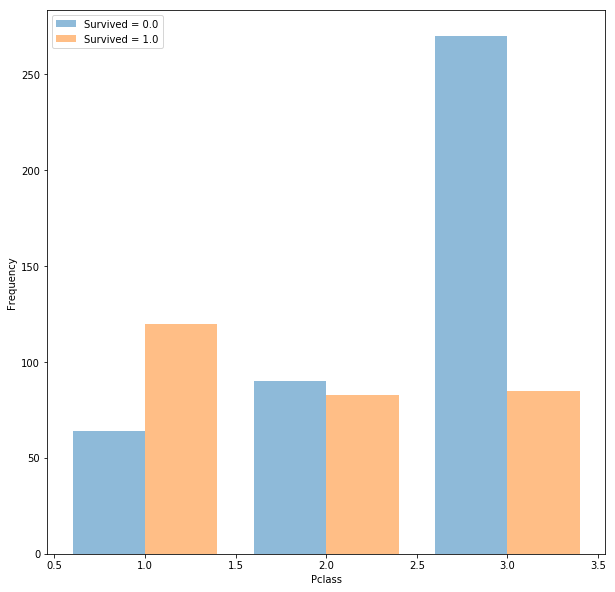

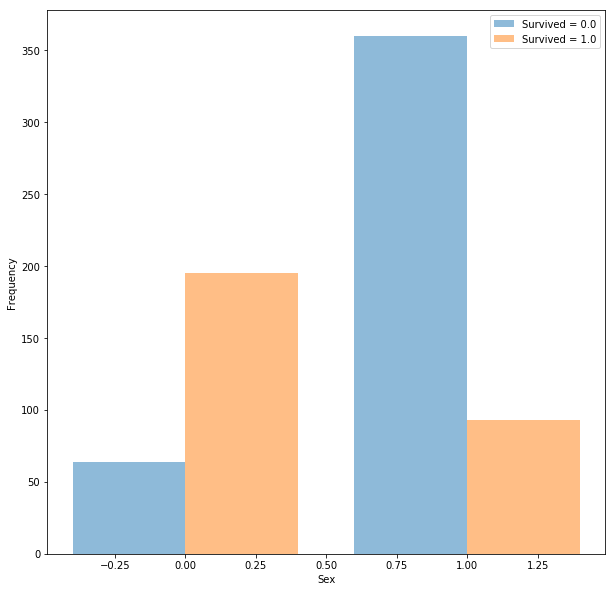

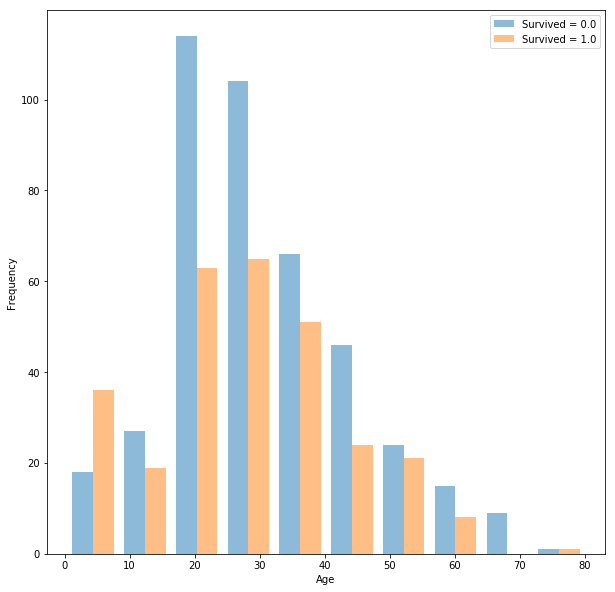

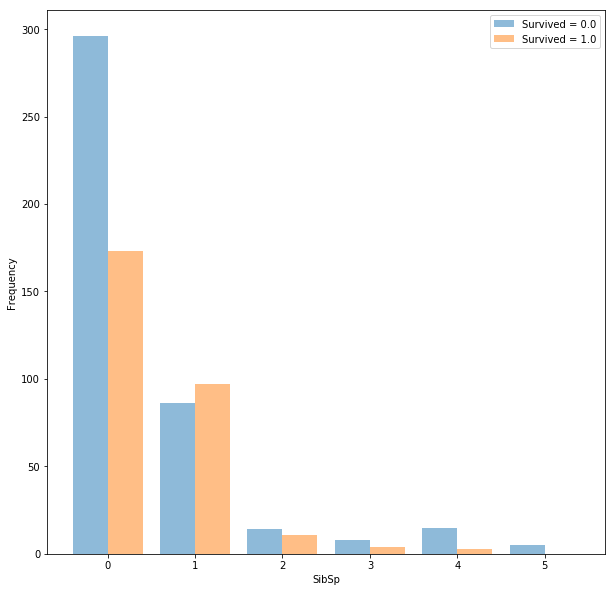

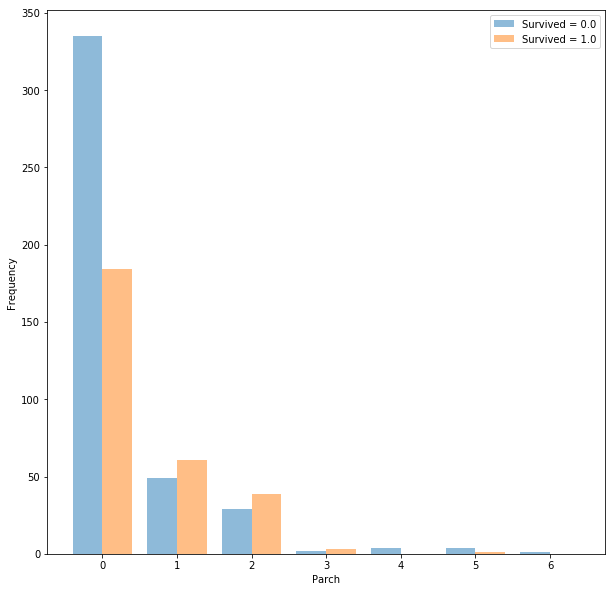

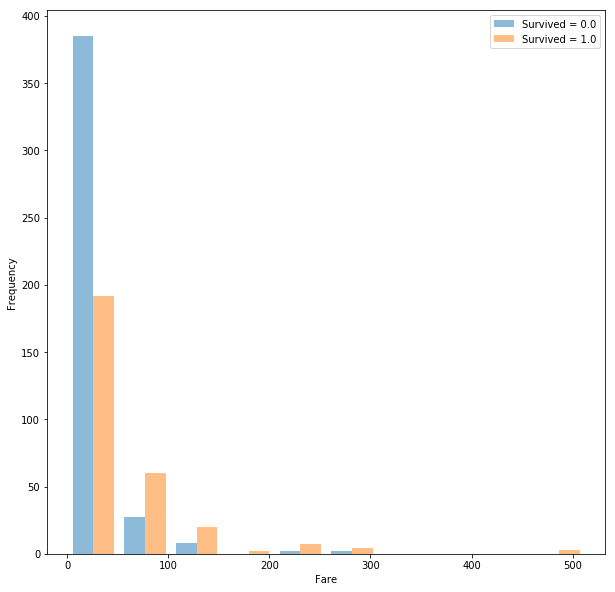

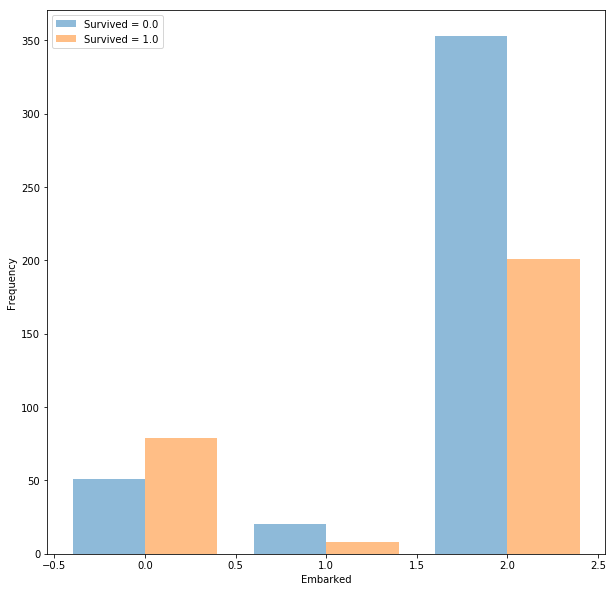

In [2]:


import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

# part a: plot histograms of each feature
print('Plotting...')
for i in range(d) :
    plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname)
    
    

The trends we see in the data is that generally the wealthier were more likely to survie. Also, women and children were also more likely to survive. This is probably what we would have predicted and the data confirmed it. 


## 4.1b)

In [3]:

# train Majority Vote classifier on data
print('Classifying using Majority Vote...')
clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
clf.fit(X, y)                  # fit training data using the classifier
y_pred = clf.predict(X)        # take the classifier and run it on the training data
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error: %.3f' % train_error)

Classifying using Majority Vote...
	-- training error: 0.404


In [4]:
### ========== TODO : START ========== ###
# part b: evaluate training error of Random classifier
print('Classifying using Random...')
clf = RandomClassifier()
clf.fit(X,y)
y_pred = clf.predict(X)
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error: %.3f' % train_error)

### ========== TODO : END ========== ###

Classifying using Random...
	-- training error: 0.485


## 4.1c)

In [5]:
print('Classifying using Decision Tree...')
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X,y)
y_pred = clf.predict(X)
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error: %.3f' % train_error)

Classifying using Decision Tree...
	-- training error: 0.014


## 4.1d)

In [6]:
print('Classifying using KNN')
k=3

clf3 = KNeighborsClassifier(n_neighbors = 3)
clf3.fit(X,y)
y_pred3 = clf3.predict(X)

clf5 = KNeighborsClassifier(n_neighbors = 5)
clf5.fit(X,y)
y_pred5 = clf5.predict(X)

clf7 = KNeighborsClassifier(n_neighbors = 7)
clf7.fit(X,y)
y_pred7 = clf7.predict(X)

y_pred = [y_pred3, y_pred5, y_pred7]
train_error = np.zeros(3)

for i in range(0,3):
    train_error[i] = 1 - metrics.accuracy_score(y, y_pred[i], normalize=True)
    
for i in range(0,3):
    print('\t-- training error for k = %i : %.3f' % (k,train_error[i]))
    k = k+2

Classifying using KNN
	-- training error for k = 3 : 0.167
	-- training error for k = 5 : 0.201
	-- training error for k = 7 : 0.240


## 4.1e)

In [7]:
### ========== TODO : START ========== ###
# part e: use cross-validation to compute average training and test error of classifiers
print('Investigating various classifiers...')

clf1 = MajorityVoteClassifier()
train_error, test_error = error(clf1, X, y, ntrials = 100, test_size = 0.2)
print('Majority Vote -- training error: '+str(train_error)+', test error: '+str(test_error))

clf2 = RandomClassifier()
train_error, test_error = error(clf2, X, y, ntrials = 100, test_size = 0.2)
print('Random Classifier -- training error: '+str(train_error)+', test error: '+str(test_error))

clf3 = DecisionTreeClassifier(criterion="entropy")
train_error, test_error = error(clf3, X, y, ntrials = 100, test_size = 0.2)
print('Decision Tree -- training error: '+str(train_error)+', test error: '+str(test_error))

clf4 = KNeighborsClassifier(n_neighbors = 5)
train_error, test_error = error(clf4, X, y, ntrials = 100, test_size = 0.2)
print('KNN -- training error: '+str(train_error)+', test error: '+str(test_error))
    
### ========== TODO : END ========== ###

Investigating various classifiers...
Majority Vote -- training error: 0.403778558875, test error: 0.407342657343
Random Classifier -- training error: 0.489015817223, test error: 0.486573426573
Decision Tree -- training error: 0.0115289982425, test error: 0.240839160839
KNN -- training error: 0.212390158172, test error: 0.314685314685


## 4.1f) 

Finding the best k for KNeighbors classifier...


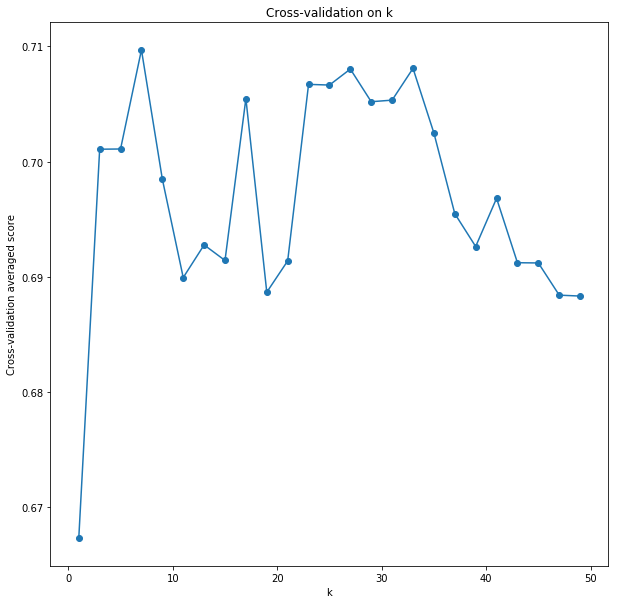

In [8]:
### ========== TODO : START ========== ###
# part f: use 10-fold cross-validation to find the best value of k for k-Nearest Neighbors classifier
print('Finding the best k for KNeighbors classifier...')

count = 0;
num_folds = 10
scores = np.zeros((25,num_folds)) #number of folds by number of k values tested

for k in np.arange(1, 50, 2):
    clf = KNeighborsClassifier(n_neighbors = k)
    scores[count,:] = cross_val_score(clf, X, y, cv=10)
    count += 1
    
averages = np.zeros(25)
for i in np.arange(25):
    averages[i] = np.sum(scores[i,:])/num_folds
    
plt.plot(np.arange(1,50,2), averages)
plt.scatter(np.arange(1,50,2), averages)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation averaged score')
plt.show()

    
### ========== TODO : END ========== ###

It is clear from the figure above that the best value of k given our cross validation tests was found to be k = 7 which returned a score(accuracy) of about 0.71.

## 4.1g)

Investigating depths...


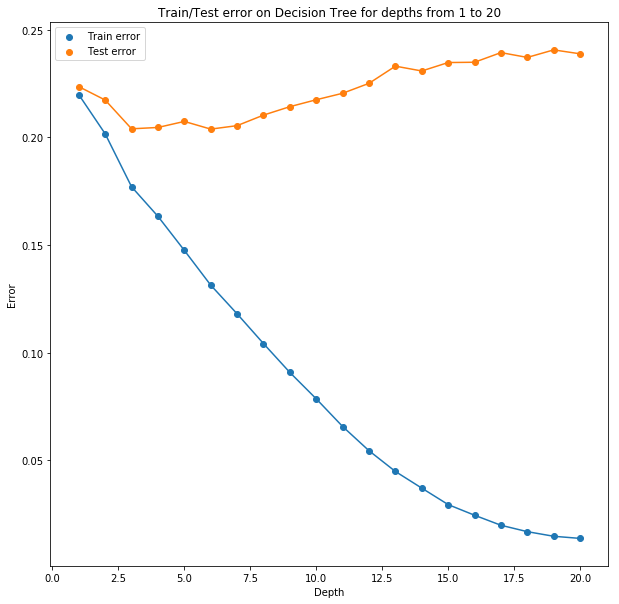

In [9]:
### ========== TODO : START ========== ###
# part g: investigate decision tree classifier with various depths
print('Investigating depths...')

depths = 20;
train_error = np.zeros(depths)
test_error = np.zeros(depths)

for depth in np.arange(1, depths+1):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    train_error[depth-1], test_error[depth-1] = error(clf, X, y, ntrials = 100, test_size = 0.2)

trainplot = plt.plot(np.arange(1,21), train_error)
trainscatter = plt.scatter(np.arange(1,21), train_error)
testplot = plt.plot(np.arange(1,21), test_error)
testscatter = plt.scatter(np.arange(1,21), test_error)
plt.legend([trainscatter, testscatter], ['Train error', 'Test error'])
plt.title('Train/Test error on Decision Tree for depths from 1 to 20')
plt.xlabel('Depth')
plt.ylabel('Error')
plt.legend()
plt.show()
### ========== TODO : END ========== ###
    

Visually we see that increasing the depth reduces the training error but after a certain critical value in the test error (which seems to be around 6-7), the test error starts to increase steeply. Visually we see that a good choice for the depth would be anything in the range 3-7 as this minimizes the test error which is the main objective. Overfitting occurs for depth > 7 as this is when the test error starts increasing. 

## 4.1h)

Investigating training set sizes...


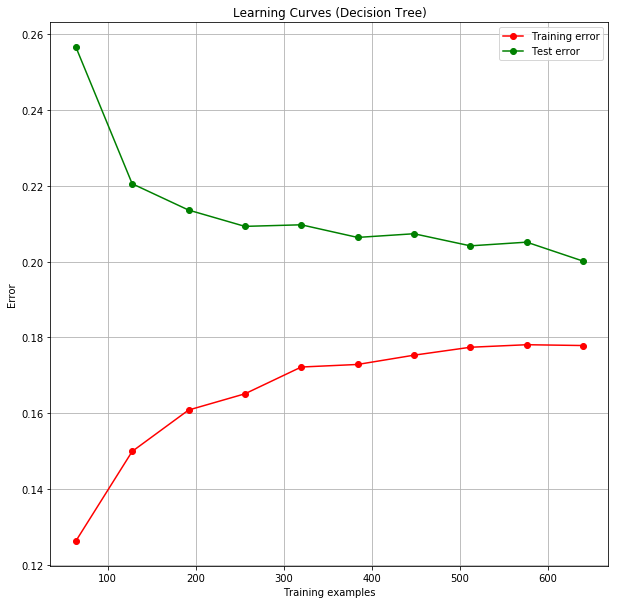

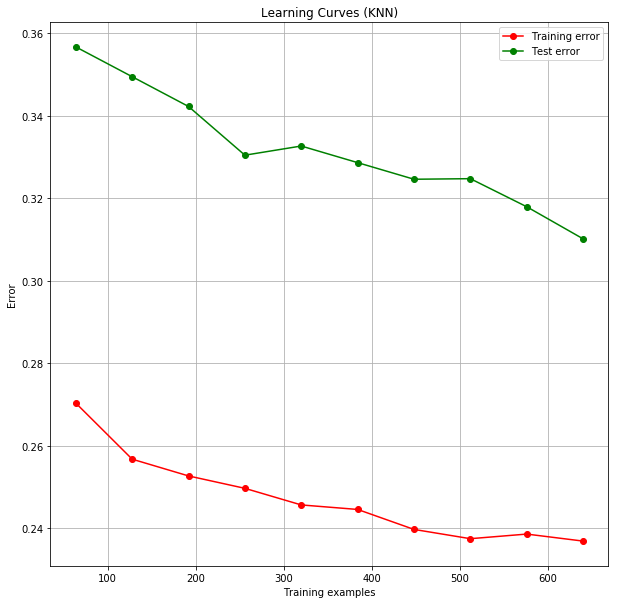

In [10]:
### ========== TODO : START ========== ###
# part h: investigate Decision Tree and k-Nearest Neighbors classifier with various training set sizes
print('Investigating training set sizes...')

bestk = 7
bestd = 3



title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth = bestd)
plot_learning_curve(clf1, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
clf2 = KNeighborsClassifier(n_neighbors = bestk)
plot_learning_curve(clf2, title, X, y, cv=cv, n_jobs=4)


plt.show()





    
### ========== TODO : END ========== ###

We see that for the decision tree, the training error starts low but then increses as the training examples increase and vice versa for the test error. This makes sense, the model generalizes better as the training examples increse. 

As for the KNN, both training error and test error decrease as training examples. This also makes intuitive sense beacuse if we have less neighbors to compare with, both the training error and test error will be high as opposed to having more neighbors to compare with. 